In [59]:
import matplotlib.pyplot as plt
import xarray as xr

from salishsea_tools import viz_tools, geo_tools

%matplotlib inline

In [1]:
bathyfile = '../../../grid/bathymetry_202108.nc'
meshfile = '../../../grid/mesh_mask201702.nc'   # warning: old mesh file!!!

In [49]:
bathy = xr.open_dataset(bathyfile)
mesh = xr.open_dataset(meshfile)
tmask = 1 - mesh.tmask[0, 0]
bmask = bathy.Bathymetry == bathy.Bathymetry  # new tmask

In [60]:
r202102 = xr.open_dataset('../../../rivers-climatology/rivers_daily_202102.nc').rorunoff[5]
d202102 = xr.open_dataset('../../../rivers-climatology/rivers_daily_202102.nc').rodepth[5]
r201803 = xr.open_dataset('../../../sea_initial_hg/rivers_month_201803.nc').rorunoff[5]
d201803 = xr.open_dataset('../../../sea_initial_hg/rivers_month_201803.nc').rodepth[:]

In [82]:
# From LocateRivers (on 201702)
myrivers1a = {'Serpentine': [49.082, -122.853, 392, 354],
            'Nicomekl': [49.063, -122.876, 388, 350],
            'LittleCampbell': [49.014, -122.779, 373, 357], 
            'Colebrook': [49.083, -122.913, 395, 346],}
fixrivers = {'Serpentine': [390, 350],
             'LittleCampbell': [372, 357], 
             'Colebrook': [390, 346],
            }
myrivers1b = {
            'Jericho': [49.276, -123.203, 453, 329, 13.3],
            'FalseCreek': [49.276, -123.139, 450, 337, 27.17],
            'FirtNarrows': [49.31, -123.097, 459, 343, 23.16 + 20.66 + 10.38 + 10.24 +
                           93.71 + 195.12 + 342.65]}

In [21]:
myrivers2 = {'Capilano': [49.320, -123.14, 458, 343, 49.370],
            'Lawson': [49.328, -123.162, 461, 341, 3.21+3.96],
            'Marr': [49.333, -123.185, 464, 338, 6.34],
            'Rodgers': [49.336, -123.196, 465, 337, 0.33*7.28],
            'RodgersB': [49.339, -123.205, 466, 337, 0.34*7.28],
            'Westmount': [49.340, -123.212, 467, 336, 0.33*7.28],
            'Cypress': [49.339, -123.241, 469, 331, 15.91],
            'Eagle': [49.357, -123.27, 474, 329, 9.84],
            'Whyte': [49.382, -123.265, 478, 332, 5.82],
            'Disbrow': [49.399, -123.25, 481, 337, 2.97],
            'Sclufield': [49.407, -123.244, 482, 339, 2.41],
             'Turpin': [49.426, -123.233, 485, 343, 7.62],
             'Harvey': [49.460, -123.24, 492, 346, 20.91],
             'Deeks': [49.502, -123.25, 501, 350, 17.42],
             'Kallahn': [49.549, -123.24, 510, 358, 13.36],
             'Furry': [49.582, -123.226, 515, 364, 66.38],
             'Britannia': [49.627, -123.207, 523, 373, 34.37],
             'Gonzalos': [49.661, -123.177, 527, 381, 15.00],
             'Shannon': [49.678, -123.16, 529, 386, 17.94], 
             'Stawanus': [49.683, -123.16, 530, 387, 57.76]
            }

In [104]:
myrivers3 = {'WoodfibreB': [49.666, -123.253, 533, 371, 47.7],
            'Woodfibre': [49.661, -123.254, 533, 370, 25.26], 
            'Foulger': [49.645, -123.261, 530, 367, 17.28],
            'Ellesmere': [49.597, -123.262, 521, 361, 15.34], 
            'Potlatch': [49.581, -123.317, 522, 350, 34.94], 
            'McNab': [49.562, -123.384, 522, 338, 72.7],
            'Bain': [49.539, -123.447, 522, 326, 13.34],
            'Rainy': [49.523, -123.483, 522, 319, 71.31],
            'McNair': [49.510, -123.493, 520, 316, 54.03], 
            'Twin': [49.480, -123.485, 513, 313, 19.56],
            'Langdale': [49.434, -123.472, 504, 309, 26.92]}

In [124]:
myrivers4 = {'Chester': [49.390, -123.556, 501, 291, 24.58],
            'Roberts': [49.421, -123.642, 512, 282, 48.83],
            'Rume': [49.428, -123.670, 517, 279, 9.17],
#            'Wilson': [49.428, -123.706, 521, 275, 25.83]
            }

In [107]:
jervis = {'Chapman': {
        'prop': 0.02, 'i': 522, 'j': 273, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Lapan': {
        'prop': 0.02, 'i': 620, 'j': 283, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Nelson': {
        'prop': 0.02, 'i': 604, 'j': 262, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Wakefield': {
        'prop': 0.02, 'i': 534, 'j': 264, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Halfmoon': {
        'prop': 0.02, 'i': 549, 'j': 254, 'di': 1, 'dj': 1, 'depth': 1,
            },
         }

In [129]:
def plot_rivers(ax):
    for rivers in [myrivers1a, myrivers1b, myrivers2, myrivers3, myrivers4]:
        for river in rivers:
            ax.plot(rivers[river][3] + 0.5, rivers[river][2] + 0.5, 'go')
    for river in jervis:
        ax.plot(jervis[river]['j'] + 0.5, jervis[river]['i'] + 0.5, 'go')

In [70]:
def plot_newrivers(ax):
    for river in fixrivers:
        ax.plot(fixrivers[river][1] + 0.5, fixrivers[river][0] + 0.5, 'm^')

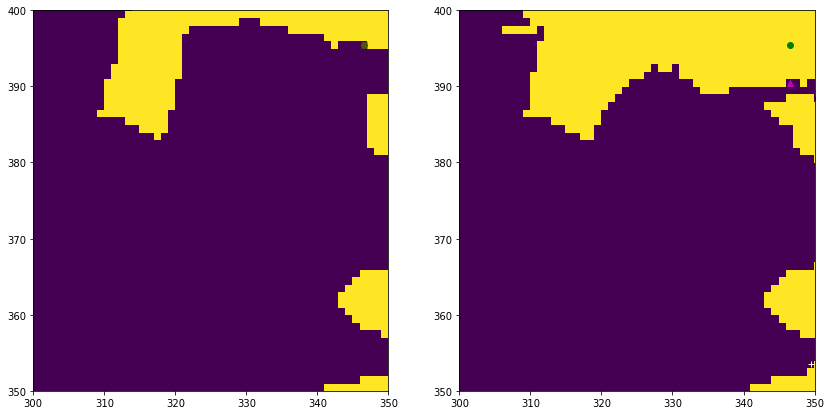

In [78]:
istart, iend = 350, 400
jstart, jend = 300, 350
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pcolormesh(tmask)
plot_rivers(axs[0])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r202102[i, j] > 0:
                axs[0].plot(j + 0.5, i + 0.5, 'rx')
            
axs[1].pcolormesh(1-bmask.astype(int))
plot_rivers(axs[1])
plot_newrivers(axs[1])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r201803[i, j] > 0:
                axs[1].plot(j + 0.5, i + 0.5, 'w+')

for ax in axs:
    ax.set_ylim(istart, iend)
    ax.set_xlim(jstart, jend)

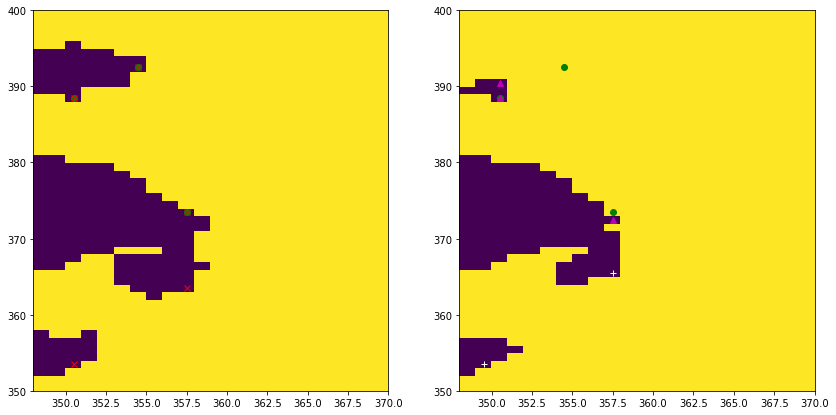

In [83]:
istart, iend = 350, 400
jstart, jend = 348, 370
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pcolormesh(tmask)
plot_rivers(axs[0])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r202102[i, j] > 0:
                axs[0].plot(j + 0.5, i + 0.5, 'rx')
            
axs[1].pcolormesh(1-bmask.astype(int))
plot_rivers(axs[1])
plot_newrivers(axs[1])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r201803[i, j] > 0:
                axs[1].plot(j + 0.5, i + 0.5, 'w+')

for ax in axs:
    ax.set_ylim(istart, iend)
    ax.set_xlim(jstart, jend)

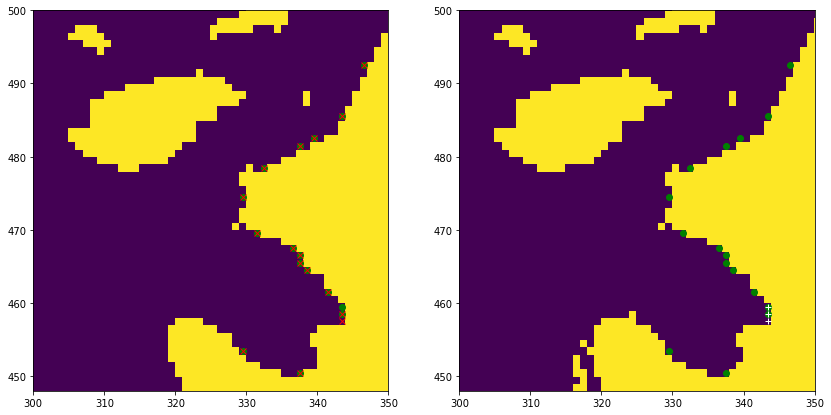

In [101]:
istart, iend = 448, 500
jstart, jend = 300, 350
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pcolormesh(tmask)
plot_rivers(axs[0])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r202102[i, j] > 0:
                axs[0].plot(j + 0.5, i + 0.5, 'rx')
            
axs[1].pcolormesh(1-bmask.astype(int))
plot_rivers(axs[1])
plot_newrivers(axs[1])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r201803[i, j] > 0:
                axs[1].plot(j + 0.5, i + 0.5, 'w+')

for ax in axs:
    ax.set_ylim(istart, iend)
    ax.set_xlim(jstart, jend)

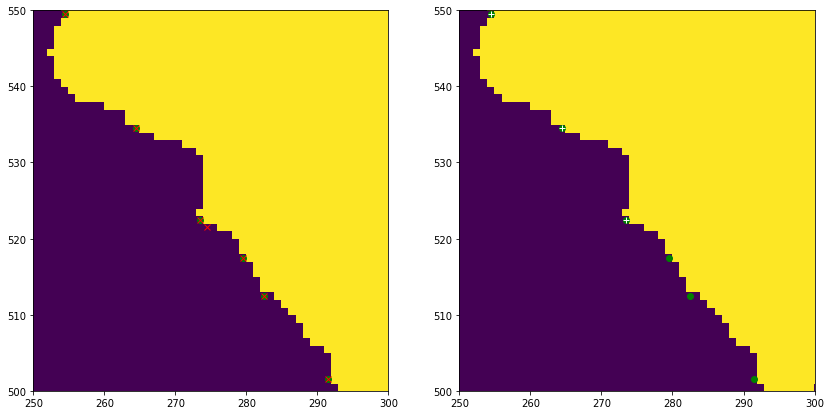

In [130]:
istart, iend = 500, 550
jstart, jend = 250, 300
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pcolormesh(tmask)
plot_rivers(axs[0])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r202102[i, j] > 0:
                axs[0].plot(j + 0.5, i + 0.5, 'rx')
            
axs[1].pcolormesh(1-bmask.astype(int))
plot_rivers(axs[1])
plot_newrivers(axs[1])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r201803[i, j] > 0:
                axs[1].plot(j + 0.5, i + 0.5, 'w+')

for ax in axs:
    ax.set_ylim(istart, iend)
    ax.set_xlim(jstart, jend)

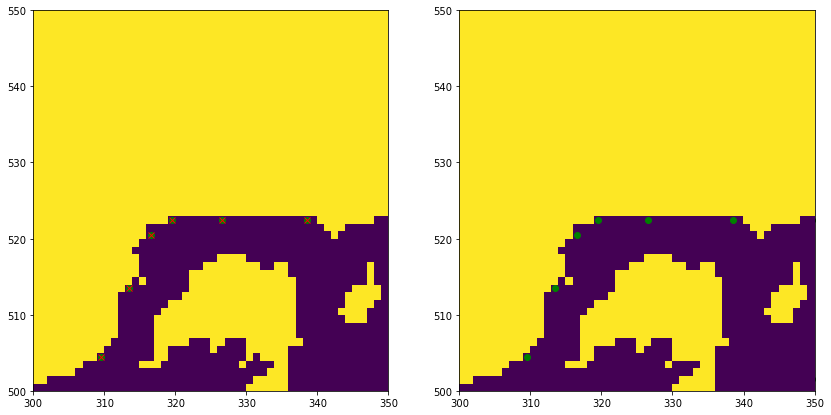

In [131]:
istart, iend = 500, 550
jstart, jend = 300, 350
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pcolormesh(tmask)
plot_rivers(axs[0])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r202102[i, j] > 0:
                axs[0].plot(j + 0.5, i + 0.5, 'rx')
            
axs[1].pcolormesh(1-bmask.astype(int))
plot_rivers(axs[1])
plot_newrivers(axs[1])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r201803[i, j] > 0:
                axs[1].plot(j + 0.5, i + 0.5, 'w+')

for ax in axs:
    ax.set_ylim(istart, iend)
    ax.set_xlim(jstart, jend)

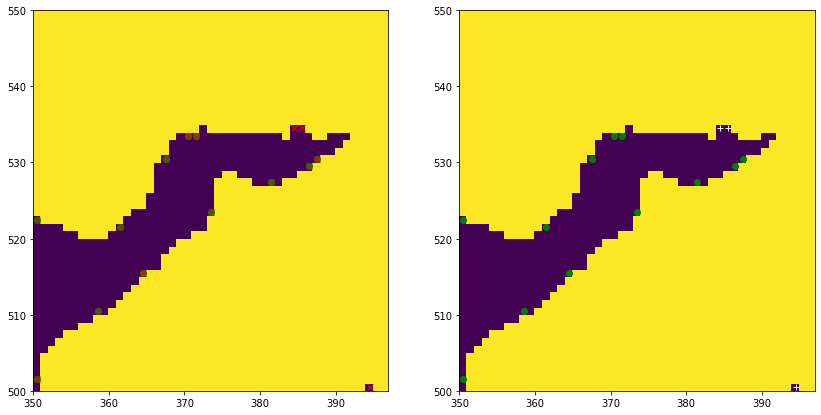

In [133]:
istart, iend = 500, 550
jstart, jend = 350, 397
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pcolormesh(tmask)
plot_rivers(axs[0])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r202102[i, j] > 0:
                axs[0].plot(j + 0.5, i + 0.5, 'rx')
            
axs[1].pcolormesh(1-bmask.astype(int))
plot_rivers(axs[1])
plot_newrivers(axs[1])
for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r201803[i, j] > 0:
                axs[1].plot(j + 0.5, i + 0.5, 'w+')

for ax in axs:
    ax.set_ylim(istart, iend)
    ax.set_xlim(jstart, jend)

So, I need to add all the changes of 2021 with small changes to these rivers.  
fixrivers = {'Serpentine': [390, 350],
             'LittleCampbell': [372, 357], 
             'Colebrook': [390, 346],}